# Intro To Geopandas
**Pandas for geospatial data**

Personally whenever I am faced with a problem that involves analysing geospatial data, [GeoPandas](http://geopandas.org/) is the first tool/package I reach for. Extending on the [Pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) data structure, GeoPandas brings functionality for working with points, polygons and more out of the box.

In [2]:
import geopandas
import pandas
from shapely.geometry import Polygon, Point

In [3]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

gdf = geopandas.GeoDataFrame(columns=['geometry'],data=[p1,p2,p3])

gdf['Data'] = {0: 0, 1: 1,2:2}

display(gdf)

,geometry,Data
0,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",0
1,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",1
2,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",2


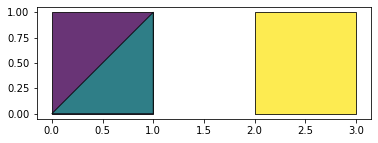

In [4]:
plt = gdf.plot(cmap='viridis',edgecolor='black',alpha=0.8)

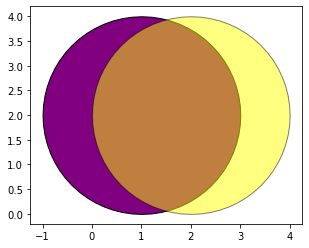

In [5]:
p1 = Point((1,2)).buffer(2)
p2 = Point((2,2)).buffer(2)

df_1 = pandas.DataFrame({'a': [11]})
df_2 = pandas.DataFrame({'b' : [22]})

gdf_1 = geopandas.GeoDataFrame(df_1, geometry = [p1])
gdf_2 = geopandas.GeoDataFrame(df_2, geometry = [p2])

gdf_1['area'] = gdf_1.geometry.apply(lambda x: x.area)
gdf_2['area'] = gdf_2.geometry.apply(lambda x: x.area)

ax = gdf_1.plot(color='purple',edgecolor='k')
gdf_2.plot(ax=ax,color='yellow',edgecolor='k',alpha=0.5)

In [8]:
overlay = geopandas.overlay(gdf_1,gdf_2,how='intersection')

total_gdf = geopandas.GeoDataFrame(pandas.concat([gdf_1,gdf_2,overlay],ignore_index=True,sort=False))
display(total_gdf)

,a,geometry,area,b,area_1,area_2
0,11.0,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",12.546194,NaN,NaN,NaN
1,NaN,"POLYGON ((4.00000 2.00000, 3.99037 1.80397, 3....",12.546194,22.0,NaN,NaN
2,11.0,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",NaN,22.0,12.546194,12.546194


In [9]:
total_gdf['area'] = total_gdf.geometry.apply(lambda x: x.area)
display(total_gdf)

,a,geometry,area,b,area_1,area_2
0,11.0,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",12.546194,NaN,NaN,NaN
1,NaN,"POLYGON ((4.00000 2.00000, 3.99037 1.80397, 3....",12.546194,22.0,NaN,NaN
2,11.0,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",8.591554,22.0,12.546194,12.546194


In [11]:
total_gdf['Total'] = total_gdf.groupby(['a'])['area'].transform('sum')
new_gdf = total_gdf.drop_duplicates(subset=['a'])
new_gdf.dropna(subset=['a'],inplace=True)
display(new_gdf)

c:\Users\jackm\Documents\GitHub\jackmckew.dev\content\2020\intro-to-geopandas\.env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,a,geometry,area,b,area_1,area_2,Total
0,11.0,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",12.546194,NaN,NaN,NaN,21.137748


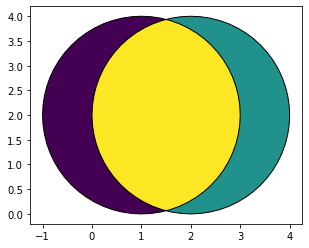

In [18]:
total_gdf.plot(cmap='viridis',edgecolor='k')